<a href="https://colab.research.google.com/github/TVSSSoureesh/Data-Analysis-on-Swiggy-Restaurant-Dataset/blob/main/Swiggy_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rrkcoder_swiggy_restaurants_dataset_path = kagglehub.dataset_download('rrkcoder/swiggy-restaurants-dataset')

print('Data source import complete.')


100%|██████████| 3.31M/3.31M [00:00<00:00, 4.01MB/s]

Extracting files...


Data source import complete.


<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Swiggy Restaurants Dataset</h4>
    </div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Uploading Files


In [11]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving swiggy_file.csv to swiggy_file.csv


In [12]:
df = pd.read_csv('swiggy_file.csv')

In [14]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,₹150 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [20]:
df.isnull().sum()

,0
Restaurant Name,0
Cuisine,27
Rating,0
Number of Ratings,14542
Average Price,0
Number of Offers,0
Offer Name,1808
Area,2
Pure Veg,0
Location,0


<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Data Cleaning</h4>
    </div>

In [31]:
#The average price is replaced from 'â‚¹50 for one' to 50
df['Average Price'] = df['Average Price'].str.extract('(\d+)').fillna(0).astype(int)


AttributeError: Can only use .str accessor with string values!

In [22]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,100,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,150,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [23]:
#The restaurants with rating '-' is replaced with zero
df['Rating'] = df['Rating'].replace('-', '0')


In [24]:
#The restaurants with rating '-' is replaced with zero
df['Number of Ratings'] = df['Number of Ratings'].replace('Too Few Ratings', '0')


In [28]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3,100,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50,150,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [25]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\+.*', '', regex=True)

In [ ]:
df

In [26]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\D', '', regex=True)

In [27]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3,100,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50,150,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9,200,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [32]:
df['Offer Name'] = df['Offer Name'].str.replace('\n', ',')

In [33]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10,250,2,"FLAT DEAL,FLAT ₹125 OFF,USE FLAT125ABOVE ₹699,...",LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50,250,2,"30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10,200,1,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500",Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8,49,5,"50% OFF UPTO ₹100,USE TRYNEWABOVE ₹129, FLAT D...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100,200,2,"DEAL OF DAY,10% OFF UPTO ₹40,USE STEALDEALABOV...",Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3,100,3,"20% OFF UPTO ₹50,USE TRYNEWABOVE ₹149, FLAT ₹1...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3,200,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50,150,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9,200,2,"FLAT ₹120 OFF,USE AXIS120ABOVE ₹500, FLAT ₹50 ...",Yavatmal Locality,No,Yavatmal


In [44]:
df['Cuisine'].value_counts()

,count
Cuisine,
"North Indian, Chinese",6641
Indian,6480
Chinese,3840
"Indian, Chinese",3515
North Indian,3506
...,...
"Assamese, Sweets",1
"Fast Food, Indonesian",1
"Street Food, Gujarati",1


In [47]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']
df.head()
pure_veg_counts.head()

,Pure Veg,Count
0,No,81494
1,Yes,59163


<div style="padding: 20px;border-radius: 16px;background-color: #FF3CAC;
background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%);
color: white;text-align:center;font-family: Inter,sans-serif;">
        <h4 style="font-size: 24px;">Exploratory Data Analysis (EDA)</h4>
    </div>

In [48]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

# Plot a pie chart
fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='seaborn'
)

fig.show()

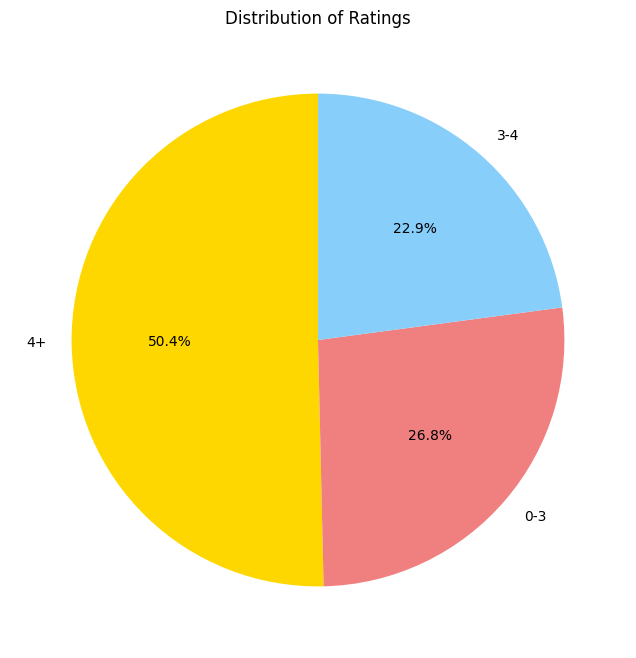

In [49]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = df['Rating Category'].value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()


In [62]:
df.columns

Index(['Restaurant Name', 'Cuisine', 'Rating', 'Number of Ratings',
       'Average Price', 'Number of Offers', 'Offer Name', 'Area', 'Pure Veg',
       'Location', 'Rating Category'],
      dtype='object')

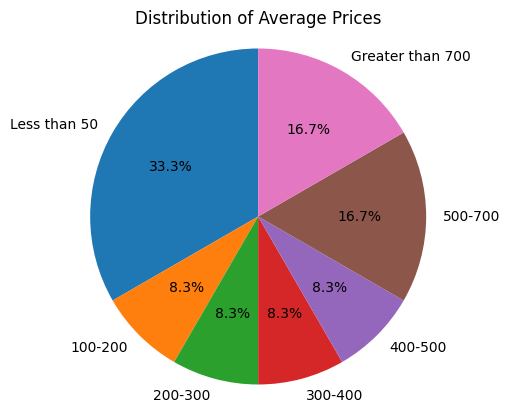

In [61]:
#After getting the unique prices, we can divide them into different categories
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450, 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

# Define the price ranges
price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
}

# Count the occurrences in each price range
price_counts = {range_name: sum(price_range(price) for price in unique_prices) for range_name, price_range in price_ranges.items()}


labels = price_counts.keys()
sizes = price_counts.values()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Distribution of Average Prices')
plt.show()


In [63]:
#To find all possible Cuisine in the dataset
cuisine_column = df['Cuisine']

all_cuisines = [cuisine.split(', ') for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

print("All Possible Cuisines:", unique_cuisines)



All Possible Cuisines: {'Tex-Mex', 'Persian', 'SVANidhi Street Food Vendor', 'Home Food', 'Lebanese', 'Tibetan', 'Meat', 'Khasi', 'Code valid on bill over Rs.500', 'chinese', 'Nepalese', 'Konkan', 'Bangladeshi', 'Default', 'Jain', 'Seafood', 'indian', 'fast food', 'French', 'Discount offer from Garden Cafe Express Kankurgachi', 'German', 'Grill', 'North Indian,', 'Awadhi', 'Momos', 'Mangalorean', 'Kashmiri', 'Healthy Food', 'snacks', 'Tandoor ', 'Oriya', 'Bengali', 'Rayalaseema', 'Rolls & Wraps', 'Biryani', 'Andhra', 'Bubble Tea', 'North Indian', 'Hyderabadi', 'Greek', 'Italian-American', 'Chettinad', 'Italian', 'Thai', 'Naga', 'North indian', 'Haleem', 'Special Discount from (The Scoop)', 'British', 'To Avail This Use Code AZAD105', 'Snacks', 'Arabian', 'Indonesian', 'Korean', 'Asian', 'Navratri Special', 'Goan', 'burgers', 'Salads', 'Mexican', 'African', 'Waffle', 'Middle Eastern', 'Singaporean', 'Keto', 'Punjabi', 'Burger', 'Bihari', 'Cakes and Pastries', 'European', 'Chinese', 'Vie

In [73]:
# Get value counts for the 'Cuisine' column
cuisine_counts = df['Cuisine'].value_counts()

# Filter counts greater than 5000 and get the top 10
top_cuisines = cuisine_counts[cuisine_counts > 5000].head(10)

# Display the result
print(top_cuisines)


,count
Cuisine,
"North Indian, Chinese",6641
Indian,6480
Chinese,3840
"Indian, Chinese",3515
North Indian,3506
...,...
"Assamese, Sweets",1
"Fast Food, Indonesian",1
"Street Food, Gujarati",1


In [75]:
top_cuisines = df['Cuisine'].value_counts().sort_values(ascending=False).head(10)
print(top_cuisines)

Cuisine
North Indian, Chinese    6641
Indian                   6480
Chinese                  3840
Indian, Chinese          3515
North Indian             3506
Bakery                   3387
Chinese, North Indian    3304
South Indian             2897
Biryani                  2410
Bakery, Desserts         2197
Name: count, dtype: int64


In [79]:
df['Cuisine'].str.split(', ').explode().value_counts().sort_values(ascending=False).head(10)

,count
Cuisine,
Chinese,37898
North Indian,28966
Indian,23374
Snacks,17468
Biryani,15132
Fast Food,13504
Beverages,13269
South Indian,12399
Pizzas,12200


In [85]:
import pandas as pd
import plotly.express as px

cuisine_counts = df['Cuisine'].str.split(', ').explode().value_counts()
top_15_cuisines = cuisine_counts.head(15)
plot_data = pd.DataFrame({'Cuisine': top_15_cuisines.index, 'Frequency': top_15_cuisines.values})
colors = px.colors.qualitative.Set3

fig = px.bar(plot_data, x='Frequency', y='Cuisine', color='Cuisine',
             color_discrete_sequence=colors,
             title='Top 15 Cuisines', width=750, height=500)

fig.update_layout(showlegend=False)
fig.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cuisine_text = ','.join(df['Cuisine'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price = df['Average Price']
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Define rating categories
def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

df['Rating Category'] = df['Rating'].apply(categorize_rating)

# Define a color palette for each category
palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_price, y=df['Rating'], hue=df['Rating Category'], palette=palette, alpha=0.7)
plt.title('Relation between Average Price and Rating')
plt.xlabel('Average Price')
plt.ylabel('Rating')
plt.legend(title='Rating Category')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS


df = df[df['Location'] != '-']
restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)

fig = px.scatter_mapbox(
    restaurant_count,
    lon='Long',
    lat='Lat',
    zoom=3,
    color='Location',
    size='count',
    title='Restaurant Distribution Across Locations',
    mapbox_style='open-street-map',
)

fig.update_layout(margin={"r": 0, 't': 50, 'l': 0, 'b': 10})
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import ArcGIS

# Assuming your data is in a DataFrame named 'df'
# Replace 'Location' with the actual column name from your dataset

# Filter out rows with '-' location (if applicable)
df = df[df['Location'] != '-']

# Group by Location and get the count of restaurants
restaurant_count = df.groupby("Location")["Restaurant Name"].count().reset_index(name='count')

# Geocode locations using ArcGIS
nom = ArcGIS()
restaurant_count[["Lat", "Long"]] = restaurant_count['Location'].apply(lambda x: nom.geocode(x)[1]).apply(pd.Series)

# Create a heatmap on Mapbox
fig = px.density_mapbox(
    restaurant_count.dropna(subset=['Lat', 'Long']),
    lat='Lat',
    lon='Long',
    z='count',
    radius=10,  # Adjust the radius as needed
    zoom=4,
    mapbox_style="carto-positron",  # You can try other mapbox styles
    title='Restaurant Heatmap in India',
)

# Show the plot
fig.show()
